# IPL Match

In [1]:
#import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
a=pd.read_csv('ipl data.csv')

In [3]:
#read ipl.csv file and print first 5 records
a.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
#check total number of columns,entries note down your findings
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [5]:
# find null values 
a.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [6]:
#drop umpire3 column as it contains more than 75% of null values
a.drop(['umpire3'],axis=1,inplace=True)

In [7]:
a.isnull().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             3
win_by_runs        0
win_by_wickets     0
player_of_match    3
venue              0
umpire1            1
umpire2            1
dtype: int64

In [8]:
#drop null values of city , winner ,player_of_match,umpire1,umpire2 column
a.dropna(inplace=True)

In [9]:
a.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

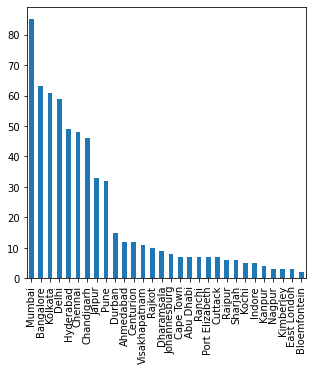

In [10]:
#which city hosted most number of matches?
#draw bar plot and write down your insights
plt.figure(figsize=(5,5))
a['city'].value_counts().plot(kind='bar')
plt.show()


In [11]:
#find all venue of mumbai city
z=np.array(a['venue'].loc[a['city']=='Mumbai'])

In [12]:
ven=np.unique(z)
ven

array(['Brabourne Stadium', 'Dr DY Patil Sports Academy',
       'Wankhede Stadium'], dtype=object)

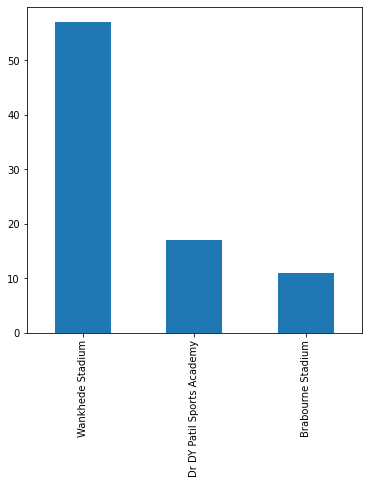

In [13]:
#now compare in which venue of mumbai most number of matches played (draw bar plot and  write down insights)

plt.figure(figsize=(6,6))
a['venue'].loc[a['city']=='Mumbai'].value_counts().plot(kind='bar')
plt.show()


In [14]:
#what is the preferred choice after winning a toss in mumbai
a['toss_decision'].loc[a['city']=='Mumbai'].value_counts()

field    51
bat      34
Name: toss_decision, dtype: int64

<AxesSubplot:>

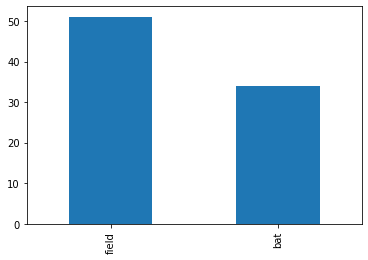

In [15]:
#graphical representation of above question
a['toss_decision'].loc[a['city']=='Mumbai'].value_counts().plot(kind='bar')

In [16]:
#which team won most number of toss
a['toss_winner'].value_counts()

Mumbai Indians                 83
Kolkata Knight Riders          77
Delhi Daredevils               71
Royal Challengers Bangalore    67
Kings XI Punjab                67
Chennai Super Kings            66
Rajasthan Royals               61
Deccan Chargers                43
Sunrisers Hyderabad            34
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

<AxesSubplot:>

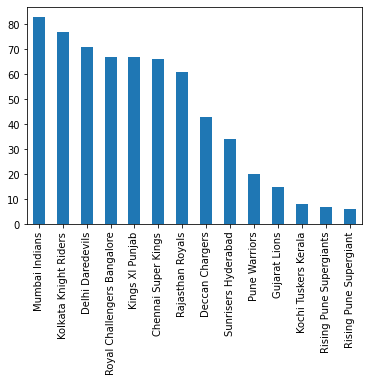

In [17]:
#show graphical representation of above question
a['toss_winner'].value_counts().plot(kind='bar')

In [18]:
#find what mumbai indians preferred after winning a toss?
a['toss_decision'].loc[a['toss_winner']=='Mumbai Indians'].value_counts()

field    44
bat      39
Name: toss_decision, dtype: int64

In [19]:
#head to head winning count of Mumbai Indians vs Chennai Super Kings
a['winner'].loc[((a['team1']=='Mumbai Indians') | (a['team2']=='Mumbai Indians')) & ((a['team1']=='Chennai Super Kings') | (a['team2']=='Chennai Super Kings')) & (a['result']=='normal')].value_counts()

Mumbai Indians         12
Chennai Super Kings     9
Name: winner, dtype: int64

In [20]:
#Which team won most of the matches in mumbai?
a["winner"].loc[a['city']=="Mumbai"].value_counts()

Mumbai Indians                 45
Chennai Super Kings             8
Kings XI Punjab                 5
Royal Challengers Bangalore     5
Rajasthan Royals                5
Deccan Chargers                 3
Kolkata Knight Riders           3
Pune Warriors                   3
Rising Pune Supergiant          2
Delhi Daredevils                2
Kochi Tuskers Kerala            1
Sunrisers Hyderabad             1
Rising Pune Supergiants         1
Gujarat Lions                   1
Name: winner, dtype: int64

In [21]:
#how many times each team won the toss and won the match
a['winner'].loc[a['toss_winner']==a['winner']].value_counts()

Mumbai Indians                 48
Kolkata Knight Riders          44
Chennai Super Kings            42
Rajasthan Royals               34
Delhi Daredevils               33
Royal Challengers Bangalore    33
Kings XI Punjab                27
Deccan Chargers                19
Sunrisers Hyderabad            16
Gujarat Lions                  10
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Pune Warriors                   3
Rising Pune Supergiants         3
Name: winner, dtype: int64

In [22]:
#how many times each team won the toss and won the match in mumbai
a['winner'].loc[(a["toss_winner"]==a["winner"]) & (a['city']=='Mumbai')].value_counts()

Mumbai Indians                 26
Chennai Super Kings             5
Deccan Chargers                 3
Rajasthan Royals                2
Delhi Daredevils                2
Royal Challengers Bangalore     2
Kochi Tuskers Kerala            1
Kolkata Knight Riders           1
Gujarat Lions                   1
Name: winner, dtype: int64

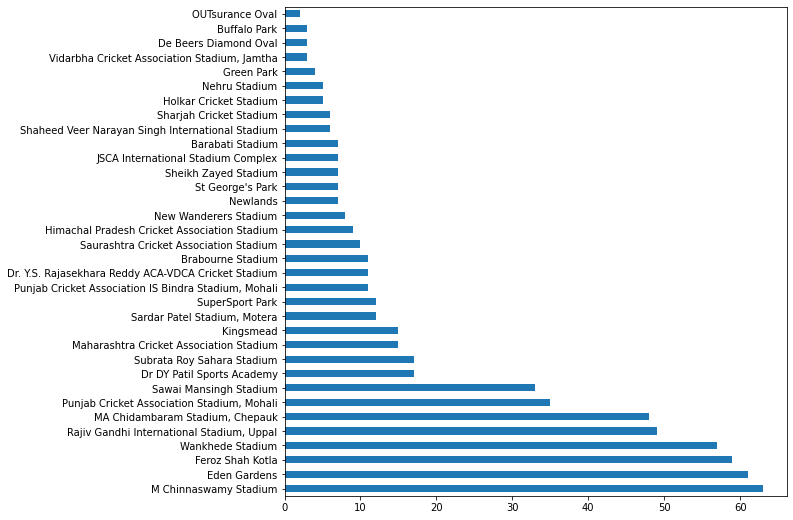

In [23]:
#which venue hosted most number of matches
plt.figure(figsize=(9,9))
a["venue"].value_counts().plot(kind='barh')
plt.show()


In [24]:
#find how many matches chennai super kings played at M Chinnaswamy stadium?
len(a.loc[(a['venue']=='M Chinnaswamy Stadium') & ((a['team1']=='Chennai Super Kings') | (a['team2']=='Chennai Super Kings'))])


7

In [25]:
#who won most matches at M Chinnaswamy stadium?
a['winner'].loc[a['venue']=='M Chinnaswamy Stadium'].value_counts()

Royal Challengers Bangalore    29
Mumbai Indians                  8
Kolkata Knight Riders           6
Kings XI Punjab                 5
Chennai Super Kings             4
Rajasthan Royals                3
Delhi Daredevils                3
Sunrisers Hyderabad             2
Rising Pune Supergiant          1
Gujarat Lions                   1
Deccan Chargers                 1
Name: winner, dtype: int64

# Year Wise Analysis

In [26]:
#matches played in each year
d=a.groupby('season')
for i in d:
    print(i[0])
    print(i[1])

2008
      id  season        city        date                        team1  \
59    60    2008   Bangalore  2008-04-18        Kolkata Knight Riders   
60    61    2008  Chandigarh  2008-04-19          Chennai Super Kings   
61    62    2008       Delhi  2008-04-19             Rajasthan Royals   
62    63    2008      Mumbai  2008-04-20               Mumbai Indians   
63    64    2008     Kolkata  2008-04-20              Deccan Chargers   
64    65    2008      Jaipur  2008-04-21              Kings XI Punjab   
65    66    2008   Hyderabad  2008-04-22              Deccan Chargers   
66    67    2008     Chennai  2008-04-23          Chennai Super Kings   
67    68    2008   Hyderabad  2008-04-24              Deccan Chargers   
68    69    2008  Chandigarh  2008-04-25              Kings XI Punjab   
69    70    2008   Bangalore  2008-04-26  Royal Challengers Bangalore   
70    71    2008     Chennai  2008-04-26        Kolkata Knight Riders   
71    72    2008      Mumbai  2008-04-27      

In [27]:
#lets analyse ipl season held in 2013
#extract all the details of 2013 season
#here we will create yearwise groups (hint: use groupby() function)
yr=d.get_group(2013)
yr

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
381,382,2013,Kolkata,2013-04-03,Delhi Daredevils,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,SP Narine,Eden Gardens,S Ravi,SJA Taufel
382,383,2013,Bangalore,2013-04-04,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Royal Challengers Bangalore,2,0,CH Gayle,M Chinnaswamy Stadium,VA Kulkarni,C Shamshuddin
383,384,2013,Hyderabad,2013-04-05,Sunrisers Hyderabad,Pune Warriors,Pune Warriors,field,normal,0,Sunrisers Hyderabad,22,0,A Mishra,"Rajiv Gandhi International Stadium, Uppal",S Ravi,SJA Taufel
384,385,2013,Delhi,2013-04-06,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Rajasthan Royals,5,0,R Dravid,Feroz Shah Kotla,S Das,C Shamshuddin
385,386,2013,Chennai,2013-04-06,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,9,0,KA Pollard,"MA Chidambaram Stadium, Chepauk",M Erasmus,VA Kulkarni
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,453,2013,Hyderabad,2013-05-19,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata Knight Riders,bat,normal,0,Sunrisers Hyderabad,0,5,PA Patel,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,S Asnani
453,454,2013,Delhi,2013-05-21,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,48,0,MEK Hussey,Feroz Shah Kotla,NJ Llong,RJ Tucker
454,455,2013,Delhi,2013-05-22,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,normal,0,Rajasthan Royals,0,4,BJ Hodge,Feroz Shah Kotla,S Ravi,RJ Tucker
455,456,2013,Kolkata,2013-05-24,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,4,Harbhajan Singh,Eden Gardens,C Shamshuddin,SJA Taufel


In [28]:
#which city hosted most number of matches in 2013 
yr['city'].value_counts()


Kolkata       8
Bangalore     8
Hyderabad     8
Delhi         8
Chennai       8
Pune          8
Jaipur        8
Mumbai        8
Chandigarh    6
Dharamsala    2
Raipur        2
Ranchi        2
Name: city, dtype: int64

# Netflix 

In [29]:
n=pd.read_csv('Netflix Dataset.csv')

In [30]:
n.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [31]:
n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [32]:
n.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [33]:
#Show id and director for House of Cards
n[['Show_Id',"Title",'Director']].loc[(n["Title"]=='House of Cards') & (n['Show_Id']) & (n['Director'])]

,Show_Id,Title,Director
2832,s2833,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J..."


In [34]:
#How many movies and tv shows are in the dataset
n['Category'].value_counts()

Movie      5379
TV Show    2410
Name: Category, dtype: int64

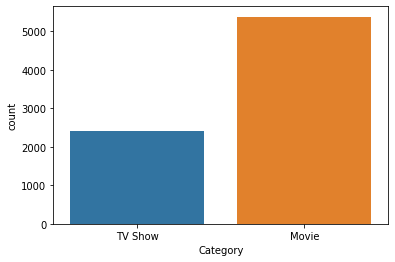

In [35]:
#Show with countplot
sns.countplot(data=n,x='Category')
plt.show()

In [36]:
import datetime as dt

In [37]:
n['Date_int']=pd.to_datetime(n['Release_Date'])

In [38]:
n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7789 non-null   object        
 1   Category      7789 non-null   object        
 2   Title         7789 non-null   object        
 3   Director      5401 non-null   object        
 4   Cast          7071 non-null   object        
 5   Country       7282 non-null   object        
 6   Release_Date  7779 non-null   object        
 7   Rating        7782 non-null   object        
 8   Duration      7789 non-null   object        
 9   Type          7789 non-null   object        
 10  Description   7789 non-null   object        
 11  Date_int      7779 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(11)
memory usage: 730.3+ KB


In [39]:
yeardata=n.groupby(n['Date_int'].dt.year)

In [40]:
yeardata.get_group(2019).head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_int
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",R,119 min,Dramas,After one of his high school students attacks ...,2019-11-01
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",2019-04-01
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,"May 17, 2019",TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,2019-05-17
13,s14,Movie,"2,215",Nottapon Boonprakob,Artiwara Kongmalai,Thailand,"March 1, 2019",TV-MA,89 min,"Documentaries, International Movies, Sports Mo...",This intimate documentary follows rock star Ar...,2019-03-01
15,s16,Movie,Oct-01,Kunle Afolayan,"Sadiq Daba, David Bailie, Kayode Olaiya, Kehin...",Nigeria,"September 1, 2019",TV-14,149 min,"Dramas, International Movies, Thrillers",Against the backdrop of Nigeria's looming inde...,2019-09-01


In [41]:
#Find in which year highest number of tv shows and movies were released.
n['Date_int'].dt.year.value_counts()

2019.0    2154
2020.0    2010
2018.0    1685
2017.0    1225
2016.0     443
2021.0     117
2015.0      88
2014.0      25
2011.0      13
2013.0      11
2012.0       3
2008.0       2
2009.0       2
2010.0       1
Name: Date_int, dtype: int64

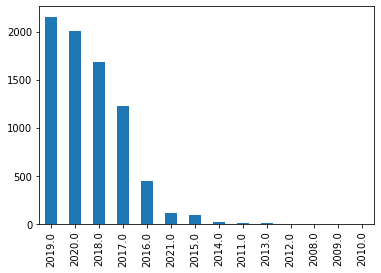

In [42]:
#Show with bar plot also
n['Date_int'].dt.year.value_counts().plot(kind='bar')
plt.show()

In [43]:
#show all the movies that were released in 2020
n.loc[(n['Category']=='Movie') & (n['Date_int'].dt.year==2020)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_int
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020-06-01
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,"March 19, 2020",R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...,2020-03-19
27,s28,Movie,#Alive,Cho Il,"Yoo Ah-in, Park Shin-hye",South Korea,"September 8, 2020",TV-MA,99 min,"Horror Movies, International Movies, Thrillers","As a grisly virus rampages a city, a lone man ...",2020-09-08
28,s29,Movie,#AnneFrank - Parallel Stories,"Sabina Fedeli, Anna Migotto","Helen Mirren, Gengher Gatti",Italy,"July 1, 2020",TV-14,95 min,"Documentaries, International Movies","Through her diary, Anne Frank's story is retol...",2020-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...
7762,s7761,Movie,Zaki Chan,Wael Ihsan,"Ahmed Helmy, Yasmin Abdulaziz, Hassan Hosny, H...",Egypt,"May 19, 2020",TV-PG,109 min,"Comedies, International Movies, Romantic Movies",An unqualified young man has his work cut out ...,2020-05-19
7783,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020-01-11
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020-10-19
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020-09-25


# videogame 

In [44]:
z=pd.read_csv("vgsales.csv")

In [45]:
z.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [46]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [47]:
z.dropna(inplace=True)

In [48]:
z.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [49]:
#find which kind of game genre is prefered by users 
z['Genre'].value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

In [50]:
#display top publisher (who publish hight numbers of games)
z['Publisher'].value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Detn8 Games                        1
Pow                                1
Navarre Corp                       1
MediaQuest                         1
UIG Entertainment                  1
Name: Publisher, Length: 576, dtype: int64

In [51]:
#top 5 gaming platforms 
z['Platform'].value_counts().head()

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
Name: Platform, dtype: int64

In [52]:
z['Year']=z['Year'].astype(int)

In [53]:
v=z.groupby('Year')
for i in v:
    print(i[0])

1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2020


In [54]:
#display all games published in 2015 
v.get_group(2015)['Name']

33                               Call of Duty: Black Ops 3
77                                                 FIFA 16
92                            Star Wars Battlefront (2015)
101                              Call of Duty: Black Ops 3
109                                              Fallout 4
                               ...                        
16499           Irotoridori no Sekai: World's End Re-Birth
16528                                    Kiniro no Corda 3
16542    Mario & Luigi: Paper Jam & Mario Kart 7 Double...
16548                  Hakuoki: Reimeiroku - Omouhase Kara
16565                                            Teslagrad
Name: Name, Length: 614, dtype: object

In [55]:
#display highly used platform in 2015
v.get_group(2015)['Platform'].value_counts()

PS4     137
PSV     113
3DS      86
XOne     79
PS3      74
PC       50
X360     40
WiiU     28
Wii       4
PSP       3
Name: Platform, dtype: int64

In [56]:
#who publishes more games in 2015
v.get_group(2015)['Publisher'].value_counts()

Namco Bandai Games      68
Activision              39
Tecmo Koei              35
Nintendo                32
Electronic Arts         32
                        ..
Marvel Entertainment     1
Experience Inc.          1
Shogakukan               1
Cygames                  1
Rain Games               1
Name: Publisher, Length: 91, dtype: int64